<a href="https://colab.research.google.com/github/pastelpargoal/RegressionTableHP/blob/main/Hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:
# Basic
import pandas as pd
import numpy as np

# Plotting
from plotnine import *
import plotnine
from mizani.formatters import scientific_format, percent_format, currency_format

# Stats
import statsmodels.api as sm
import scipy.stats as stats

## Loading Datasets


### Data Cleaning and Merging

In [187]:

file = 'https://raw.githubusercontent.com/envirodatascience/ENVS-617-Class-Data/main/CO_climate_change_views_S24.csv'#
ccViews = pd.read_csv(file)
ccViews.head()

,Unnamed: 0,OS,Country,City,Provider,Gender,DOB,facebook_use,voter_reg,works_in_oil_gas,climate_change_importance,climate_change_worry,climate_change_personal_harm,climate_change_future_gen_harm,county
0,0,Android,US,Frisco,Unknown,female,1966,Every day,Not registered to vote,No,Very important,Somewhat worried,Only a little,A great deal,Summit County
1,1,iOS,US,Denver,Unknown,male,1961,Every day,"Registered to vote, registered as Democratic",No,Very important,Somewhat worried,A moderate amount,A great deal,Boulder County
2,2,iOS,US,Denver,Unknown,female,1986,Every day,Not registered to vote,No,Very important,Somewhat worried,A moderate amount,A great deal,Douglas County
3,3,Android,US,Denver,T-Mobile,male,1991,Every day,Not registered to vote,"Yes, a close friend or family member is employ...",Very important,Not very worried,A moderate amount,A moderate amount,Adams County
4,4,Android,US,Denver,Unknown,female,1985,Every day,"Registered to vote, registered as Independent,...",No,Very important,Very worried,A moderate amount,A great deal,Denver County


# Orient to the Poll data





In [188]:
ccViews.shape

(745, 15)

In [189]:
ccViews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      745 non-null    int64 
 1   OS                              745 non-null    object
 2   Country                         745 non-null    object
 3   City                            745 non-null    object
 4   Provider                        745 non-null    object
 5   Gender                          745 non-null    object
 6   DOB                             745 non-null    int64 
 7   facebook_use                    745 non-null    object
 8   voter_reg                       745 non-null    object
 9   works_in_oil_gas                745 non-null    object
 10  climate_change_importance       745 non-null    object
 11  climate_change_worry            745 non-null    object
 12  climate_change_personal_harm    745 non-null    ob

## a. Check how people responded to each climate change question

In [190]:
print(ccViews['climate_change_future_gen_harm'].value_counts())
print(ccViews['climate_change_worry'].value_counts())
print(ccViews['climate_change_personal_harm'].value_counts())
print(ccViews['climate_change_future_gen_harm'].value_counts())


climate_change_future_gen_harm
A great deal         454
A moderate amount    159
Only a little         50
Not at all            43
Don’t know            39
Name: count, dtype: int64
climate_change_worry
Very worried          312
Somewhat worried      276
Not very worried      106
Not at all worried     51
Name: count, dtype: int64
climate_change_personal_harm
A moderate amount    280
A great deal         202
Only a little        147
Not at all            74
Don’t know            42
Name: count, dtype: int64
climate_change_future_gen_harm
A great deal         454
A moderate amount    159
Only a little         50
Not at all            43
Don’t know            39
Name: count, dtype: int64


## b. Other field values: Look at the value counts of each of the other fields in the dataset other than the climate opinion fields.

In [191]:
print(ccViews['City'].value_counts())
print(ccViews['Provider'].value_counts())
print(ccViews['Gender'].value_counts())
print(ccViews['DOB'].value_counts())
print(ccViews['facebook_use'].value_counts())
print(ccViews['voter_reg'].value_counts())
print(ccViews['works_in_oil_gas'].value_counts())


City
Denver              279
Colorado Springs     81
Unknown              41
Arvada               40
Aurora               39
                   ... 
Cedaredge             1
Louisville            1
Frederick             1
Gypsum                1
Dillon                1
Name: count, Length: 68, dtype: int64
Provider
Unknown         426
T-Mobile        103
Verizon         102
AT&T             79
Sprint           30
Viaero            3
Boost Mobile      2
Name: count, dtype: int64
Gender
female    418
male      327
Name: count, dtype: int64
DOB
1980    34
1988    34
1985    28
1984    24
1986    23
        ..
1964     2
1945     1
1936     1
1947     1
1933     1
Name: count, Length: 62, dtype: int64
facebook_use
Every day                            511
Once a week                          106
I never use Facebook or Instagram     55
Once a month                          37
Less than once a month                36
Name: count, dtype: int64
voter_reg
Registered to vote, registered as Democr

## c. Create the outcome variable: Create a new binary field that indicates if an individual is neutral about climate change or not neutral. Basically, this will be people who are not yet alarmed and also are not dismissive of climate change.

In [192]:

ccViews['neutral'] = np.where(ccViews['climate_change_worry'] == "Somewhat worried", "Neutral", "Not Neutral")
ccViews[['climate_change_worry','neutral']].head()

,climate_change_worry,neutral
0,Somewhat worried,Neutral
1,Somewhat worried,Neutral
2,Somewhat worried,Neutral
3,Not very worried,Not Neutral
4,Very worried,Not Neutral


In [193]:
# Create binary variable for neutral
ccViews['neutral'] = np.where(ccViews['climate_change_worry'] == "Somewhat worried", 1, 0)
ccViews[['climate_change_worry','neutral']].head()

,climate_change_worry,neutral
0,Somewhat worried,1
1,Somewhat worried,1
2,Somewhat worried,1
3,Not very worried,0
4,Very worried,0


In [194]:
# Check the binary was created properly
ccViews.groupby('climate_change_worry').agg(neutral_min = ('neutral','min'), neutral_max = ('neutral','max'))

,neutral_min,neutral_max
climate_change_worry,,
Not at all worried,0,0
Not very worried,0,0
Somewhat worried,1,1
Very worried,0,0


## 2. Explore relationships between variables



## a. Make a list of all the features in this data that you think might be correlated with beliefs about climate change. Specifically, what might be correlated with neutral beliefs about climate change? Write a few sentences about why. Pick 3-4 of these features as your independent variables for an initial model!




I picked these three variables: voter_reg, works_in_oil_gas, and facebook_use as the three features.

1)Voter registration can determine beliefs about climate change. Both Democratics and Replicans tend to have strong beliefs about climate change while non voters may not have as strong beliefs, so they may be neutral.

2) People that tend to work in oil and gas industry may have strong beliefs about climate change such as promoting more fossil fuels which goes against climate change goals while people that do not work in oil and gas industry more likely have neutral beliefs.

3)Active Facebook users may have strong beliefs in general but this may include climate change beliefs. In contrast, inactive Facebook users may not be up to date with news and opinions about topics, so they might have neutral beliefs.


## b. If any of the independent variables you brainstormed are transformations of the existing data fields (buckets, normalization, etc.), go ahead and code those transformations.

### Voter Reg Variable

In [195]:
ccViews['neutral_voter_reg'] = np.where(
    ccViews['voter_reg'].isin([
        'Registered to vote, registered as Democratic',
        'Registered to vote, registered as Republican'
    ]), 0, 1
)
ccViews['neutral_voter_reg']
ccViews.neutral_voter_reg.value_counts()

,count
neutral_voter_reg,
1,500
0,245


### Oil and Gas Industry Variable

In [196]:
ccViews['neutral_oilgas'] = np.where(
    ccViews['works_in_oil_gas'].isin([
        'Yes, a close friend or family member is employed in the oil and gas industry',
        'Yes, I am employed in the oil and gas industry',
        'Yes, both myself and close friends or family members are employed in the oil and gas industry'
    ]), 0, 1
)
ccViews.neutral_oilgas.value_counts()

,count
neutral_oilgas,
1,584
0,161


### Facebook User

In [206]:
ccViews['neutral_facebook_use'] = np.where(
    ccViews['facebook_use'].isin([
        'Every day',
        'Once a week',
        #'Yes, both myself and close friends or family members are employed in the oil and gas industry'
    ]), 0, 1
)
ccViews.neutral_facebook_use.value_counts()

,count
neutral_facebook_use,
0,617
1,128


## c. Now look into how those independent variables relate to the outcome variable at a high level. Suggestions:


### i. group_by()your independent variable to check for any differences in the outcome variable, checking the percent of respondents who are neutral.Investigate any surprising results.


In [207]:
ccViews.groupby('neutral_voter_reg').agg(n_ind = ('voter_reg','count'), avg_neutral = ('neutral', 'mean'))


,n_ind,avg_neutral
neutral_voter_reg,,
0,245,0.359184
1,500,0.376000


In [208]:
ccViews.groupby('neutral_facebook_use').agg(n_ind = ('facebook_use','count'), avg_neutral = ('neutral', 'mean'))

,n_ind,avg_neutral
neutral_facebook_use,,
0,617,0.384117
1,128,0.304688


In [209]:
ccViews.groupby('neutral_oilgas').agg(n_ind = ('works_in_oil_gas','count'), avg_neutral = ('neutral', 'mean'))

,n_ind,avg_neutral
neutral_oilgas,,
0,161,0.285714
1,584,0.393836


In [210]:
ccViews.groupby('works_in_oil_gas').agg(avg_neutral = ('neutral', 'mean'))

,avg_neutral
works_in_oil_gas,
No,0.398897
Not sure,0.325000
"Yes, I am employed in the oil and gas industry",0.135135
"Yes, a close friend or family member is employed in the oil and gas industry",0.330000
"Yes, both myself and close friends or family members are employed in the oil and gas industry",0.333333


In [225]:
ccViews.groupby('facebook_use').agg(avg_neutral = ('neutral', 'mean'))

,avg_neutral
facebook_use,
Every day,0.387476
I never use Facebook or Instagram,0.309091
Less than once a month,0.305556
Once a month,0.297297
Once a week,0.367925


In [226]:

ccViews.groupby('voter_reg').agg(avg_neutral = ('neutral', 'mean'))

,avg_neutral
voter_reg,
I don’t know,0.419355
Not registered to vote,0.492537
"Registered to vote, registered as Democratic",0.359184
"Registered to vote, registered as Independent, third party, unknown, or unaffiliated",0.331797
"Registered to vote, registered as Republican",0.313559


ccViews.groupby('facebook_use').agg(avg_neutral = ('neutral', 'mean'))

### ii. Visualize your independent variable vs. your outcome variable Adjust your selection or transformation of independent variables to improve your model, if necessary.


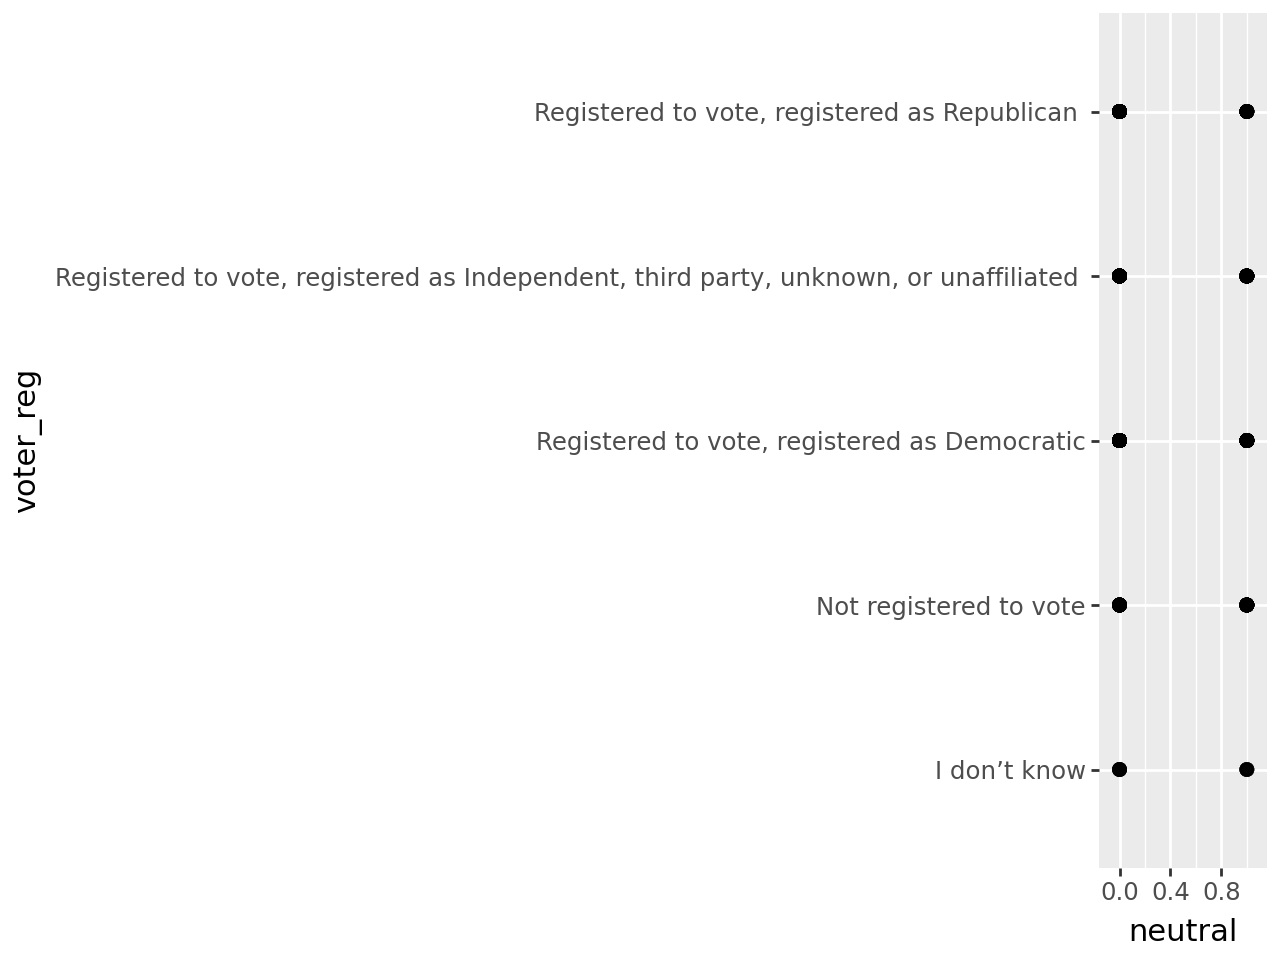

In [231]:


(ggplot(ccViews, aes(x='neutral', y='voter_reg'))
+ geom_point(alpha=.25, size=2)
 + xlim(-0.1, 1.1)
 )

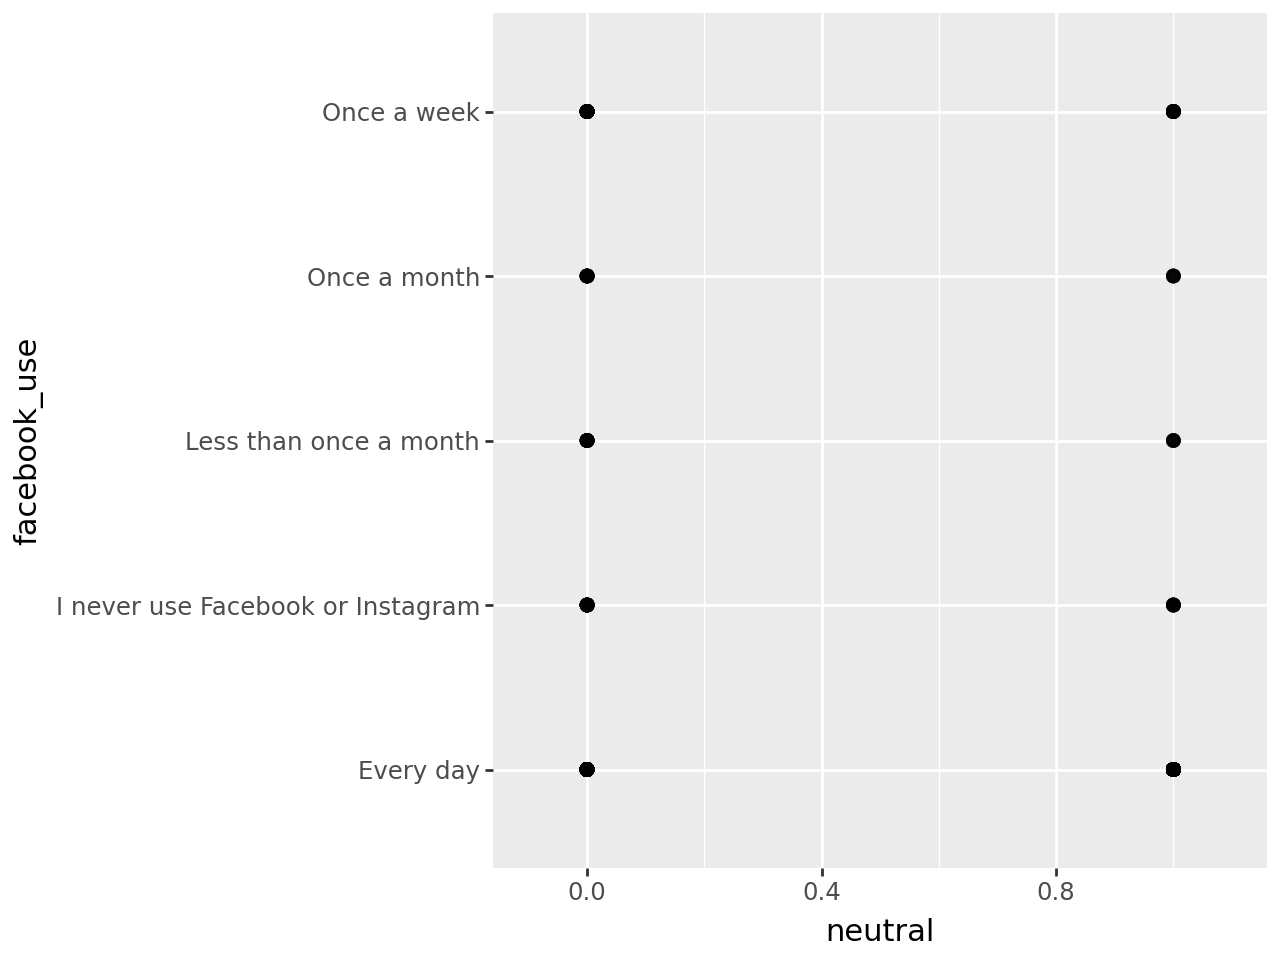

In [219]:
(ggplot(ccViews, aes(x='neutral', y='facebook_use'))
 + geom_point(alpha=.25, size=2)
 + xlim(-0.1, 1.1)
)

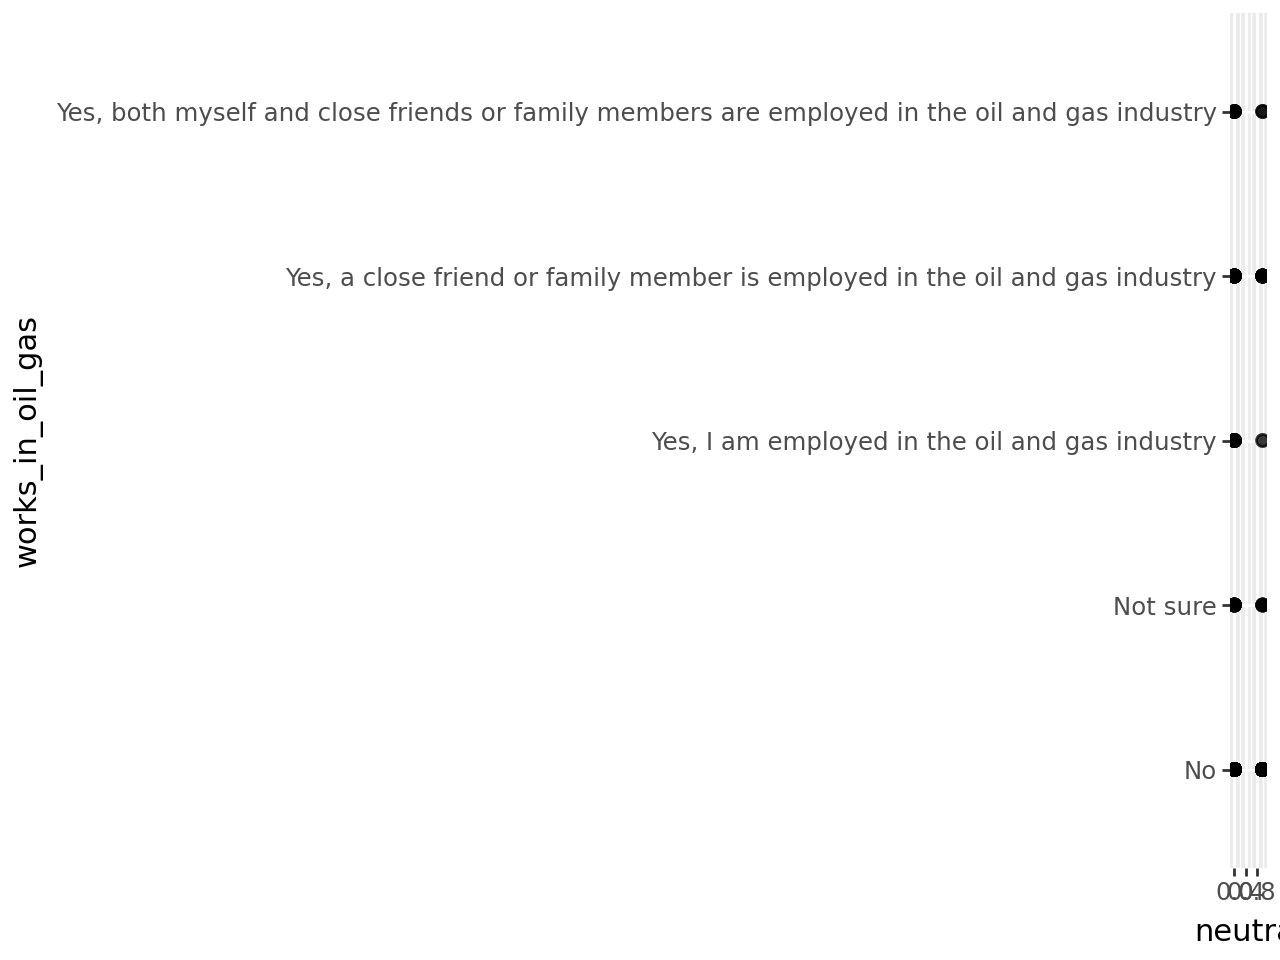

In [232]:
(ggplot(ccViews, aes(x='neutral', y='works_in_oil_gas'))
 + geom_point(alpha=.25, size=2)
 + xlim(-0.1, 1.1)
)

## d. If needed, turn any categorical variables into ‘dummy’ variables, with a column for each value.


## e. Make a correlation heatmap of your final features to see how they are correlated. What do you observe? Write a few sentences. Make any additional modifications to your final features that you believe will improve the model.

In [222]:
# Check correlations between all variables
df_to_correlate = ccViews[['neutral_voter_reg','neutral', 'neutral_oilgas', 'neutral_facebook_use']]

df_corr = df_to_correlate.corr()


In [223]:
# Format
df_corr.style.background_gradient(cmap ='Reds')

,neutral_voter_reg,neutral,neutral_oilgas,neutral_facebook_use
neutral_voter_reg,1.000000,0.016359,0.062848,0.076454
neutral,0.016359,1.000000,0.092149,-0.062042
neutral_oilgas,0.062848,0.092149,1.000000,0.014367
neutral_facebook_use,0.076454,-0.062042,0.014367,1.000000


Observations -

In [224]:
y = ccViews['neutral']
x = sm.add_constant(ccViews[['neutral_voter_reg',  'neutral_oilgas', 'neutral_facebook_use']])

result=sm.Logit(y,x).fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.652648
         Iterations 5
                           Results: Logit
Model:                 Logit             Method:            MLE     
Dependent Variable:    neutral           Pseudo R-squared:  0.010   
Date:                  2025-02-26 08:45  AIC:               980.4459
No. Observations:      745               BIC:               998.8994
Df Model:              3                 Log-Likelihood:    -486.22 
Df Residuals:          741               LL-Null:           -491.11 
Converged:             1.0000            LLR p-value:       0.020626
No. Iterations:        5.0000            Scale:             1.0000  
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
const                -0.9035   0.2031 -4.4476 0.0000 -1.3016 -0.5053
neutral_voter_reg     0.0694

In [221]:
ccViews.columns

Index(['Unnamed: 0', 'OS', 'Country', 'City', 'Provider', 'Gender', 'DOB',
       'facebook_use', 'voter_reg', 'works_in_oil_gas',
       'climate_change_importance', 'climate_change_worry',
       'climate_change_personal_harm', 'climate_change_future_gen_harm',
       'county', 'neutral', 'neutral_voter_reg', 'neutral_oilgas',
       'neutral_facebook_use', 'neutral_numeric'],
      dtype='object')